In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Q4. Are there any significant differences in pickups on holidays compared to regular days?

In [4]:
uber_weather_df = pd.read_csv("Resources/clean.csv")
uber_weather_df.head()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday
0,2015-01-01 00:00:00,0,January,Bronx,33.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
1,2015-01-01 00:00:00,0,January,Brooklyn,517.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
2,2015-01-01 00:00:00,0,January,EWR,0.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
3,2015-01-01 00:00:00,0,January,Manhattan,1301.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
4,2015-01-01 00:00:00,0,January,Queens,243.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y


In [5]:
# Count the number of regular days (non-holidays)
regular_days_count = (uber_weather_df['Holiday'] == 'N').sum()

# Count the number of holidays
holidays_count = (uber_weather_df['Holiday'] == 'Y').sum()

print(f"Number of regular days: {regular_days_count}")
print(f"Number of holidays: {holidays_count}")

Number of regular days: 25056
Number of holidays: 1008


In [6]:
uber_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26064 entries, 0 to 26063
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pickup_dt           26064 non-null  object 
 1   hour                26064 non-null  int64  
 2   month               26064 non-null  object 
 3   borough             26064 non-null  object 
 4   pickups             26064 non-null  float64
 5   Wind speed          26064 non-null  float64
 6   Visibility          26064 non-null  float64
 7   Temperature         26064 non-null  float64
 8   dew point           26064 non-null  float64
 9   Sea level pressure  26064 non-null  float64
 10  Precipitation 01    26064 non-null  float64
 11  Precipitation 06    26064 non-null  float64
 12  Precipitation 24    26064 non-null  float64
 13  Snow depth          26064 non-null  float64
 14  Holiday             26064 non-null  object 
dtypes: float64(10), int64(1), object(4)
memory usage: 3.0

In [7]:
uber_weather_df['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

pickup_dt: Date and time of the data point.

borough: The borough in New York City (e.g., Bronx, Brooklyn, Manhattan, etc.).

pickups: The number of pickups recorded for that hour in the borough.

spd: Speed (assuming it's related to wind speed).

vsb: Visibility (assuming it's related to visibility conditions).

temp: Temperature.

dewp: Dew point.

slp: Sea level pressure.

pcp01: Precipitation in the last hour.

pcp06: Precipitation in the last 6 hours.

pcp24: Precipitation in the last 24 hours.

sd: Snow depth.

hday: A flag or indicator (perhaps for a holiday).

In [8]:
#GROUP THE DATA BY HOLYDAY AND REGULAR DAY
# Group the data by holiday
holiday_group = uber_weather_df[uber_weather_df['Holiday'] == 'Y']
holiday_group.head()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday
0,2015-01-01 00:00:00,0,January,Bronx,33.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
1,2015-01-01 00:00:00,0,January,Brooklyn,517.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
2,2015-01-01 00:00:00,0,January,EWR,0.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
3,2015-01-01 00:00:00,0,January,Manhattan,1301.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
4,2015-01-01 00:00:00,0,January,Queens,243.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y


In [9]:
#GROUP BY REGULAR DAYS
regular_day_group = uber_weather_df[uber_weather_df['Holiday'] != 'Y']
regular_day_group.head()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday
144,2015-01-02 00:00:00,0,January,Bronx,24.0,0.0,10.0,3.888889,13.0,1015.3,0.0,0.0,0.0,0.0,N
145,2015-01-02 00:00:00,0,January,Brooklyn,331.0,0.0,10.0,3.888889,13.0,1015.3,0.0,0.0,0.0,0.0,N
146,2015-01-02 00:00:00,0,January,EWR,0.0,0.0,10.0,3.888889,13.0,1015.3,0.0,0.0,0.0,0.0,N
147,2015-01-02 00:00:00,0,January,Manhattan,808.0,0.0,10.0,3.888889,13.0,1015.3,0.0,0.0,0.0,0.0,N
148,2015-01-02 00:00:00,0,January,Queens,220.0,0.0,10.0,3.888889,13.0,1015.3,0.0,0.0,0.0,0.0,N


In [10]:
print(f'Number of regular days : {len(regular_day_group)}')
print(f'Number of Holidays : {len(holiday_group)}')

Number of regular days : 25056
Number of Holidays : 1008


In [11]:
# Calculate the mean pickups for each group
mean_pickups_holiday = holiday_group['pickups'].mean()
mean_pickups_regular = regular_day_group['pickups'].mean()
print(f'Mean Holydays {mean_pickups_holiday}')
print(f'Mean Regular Days {mean_pickups_regular}')

Mean Holydays 488.046626984127
Mean Regular Days 549.5552362707535


In [12]:
# Perform a t-test to check for significance
from scipy import stats
#running a t-test to see significance 
t_stat, p_value = stats.ttest_ind(holiday_group['pickups'], regular_day_group['pickups'])
# Define a significance level (e.g., 0.05)
alpha = 0.05
# Compare the p-value to the significance level
if p_value < alpha:
    significance_result = "There is a significant difference"
else:
    significance_result = "There is no significant difference"
print(f"t-test value: {t_stat}") 
print(f" P Value: {p_value}")
significance_result

t-test value: -1.8460868817315839
 P Value: 0.06489092381741797


'There is no significant difference'

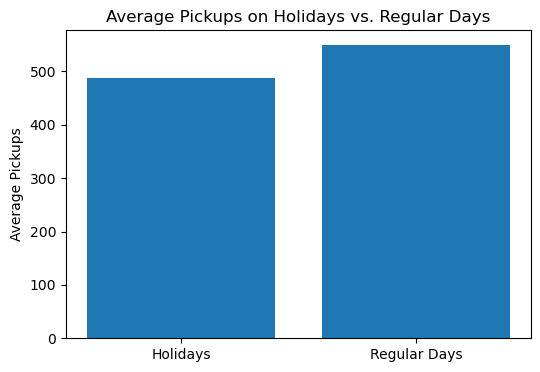

In [13]:
# Create a bar plot to visualize the comparison
plt.figure(figsize=(6, 4))
plt.bar(['Holidays', 'Regular Days'], [mean_pickups_holiday, mean_pickups_regular])
plt.title("Average Pickups on Holidays vs. Regular Days")
plt.ylabel("Average Pickups")
plt.show()


In [14]:
# Print the results
print(significance_result)
print("Mean pickups on holidays:", mean_pickups_holiday)
print("Mean pickups on regular days:", mean_pickups_regular)

There is no significant difference
Mean pickups on holidays: 488.046626984127
Mean pickups on regular days: 549.5552362707535


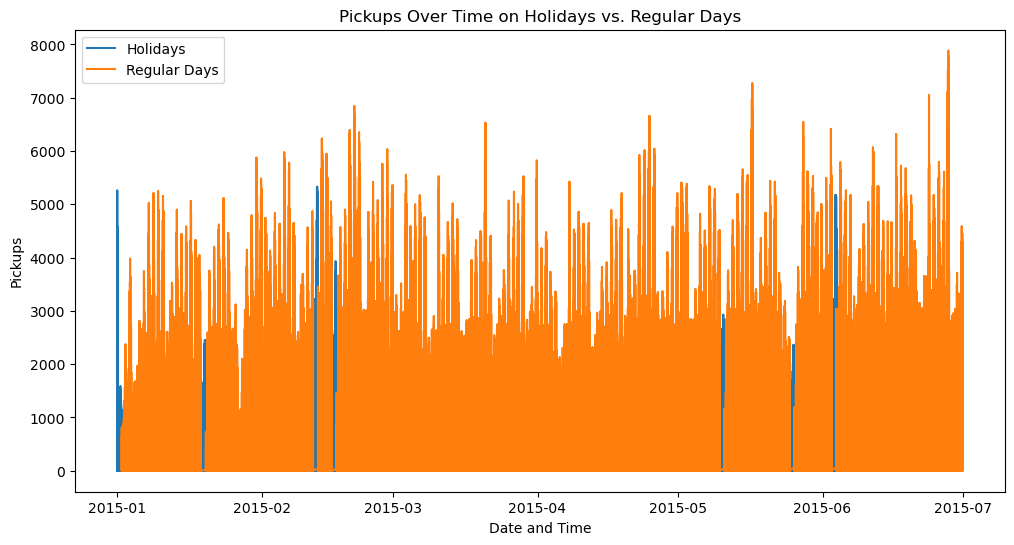

In [15]:
#Time Analysis
#this is a time series plot created by using multiple time periods, 
#This chart helps to visualize how pickups vary over time for both holidays and regular days.

uber_weather_df['pickup_dt'] = uber_weather_df['pickup_dt'].astype('datetime64')
plt.figure(figsize=(12, 6))
plt.plot(uber_weather_df[uber_weather_df['Holiday'] == 'Y']['pickup_dt'], uber_weather_df[uber_weather_df['Holiday'] == 'Y']['pickups'], label='Holidays')
plt.plot(uber_weather_df[uber_weather_df['Holiday'] != 'Y']['pickup_dt'], uber_weather_df[uber_weather_df['Holiday'] != 'Y']['pickups'], label='Regular Days')
plt.title("Pickups Over Time on Holidays vs. Regular Days")
plt.xlabel("Date and Time")
plt.ylabel("Pickups")
plt.legend()
plt.show()

In [16]:
#including weekends as holidays
uber_weather_df['Holiday'] = uber_weather_df['pickup_dt'].dt.dayofweek.isin([5, 6]).map({True: 'Y', False: 'N'})
uber_weather_df

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday
0,2015-01-01 00:00:00,0,January,Bronx,33.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,N
1,2015-01-01 00:00:00,0,January,Brooklyn,517.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,N
2,2015-01-01 00:00:00,0,January,EWR,0.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,N
3,2015-01-01 00:00:00,0,January,Manhattan,1301.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,N
4,2015-01-01 00:00:00,0,January,Queens,243.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26059,2015-06-30 23:00:00,23,June,Brooklyn,990.0,7.000000,10.000000,23.888889,65.000000,1011.800000,0.000000,0.000000,0.000000,0.000000,N
26060,2015-06-30 23:00:00,23,June,EWR,0.0,7.000000,10.000000,23.888889,65.000000,1011.800000,0.000000,0.000000,0.000000,0.000000,N
26061,2015-06-30 23:00:00,23,June,Manhattan,3828.0,7.000000,10.000000,23.888889,65.000000,1011.800000,0.000000,0.000000,0.000000,0.000000,N
26062,2015-06-30 23:00:00,23,June,Queens,580.0,7.000000,10.000000,23.888889,65.000000,1011.800000,0.000000,0.000000,0.000000,0.000000,N


In [17]:
# Count the number of regular days (non-holidays)
regular_days_count = (uber_weather_df['Holiday'] == 'N').sum()

# Count the number of holidays
holidays_count = (uber_weather_df['Holiday'] == 'Y').sum()

print(f"Number of regular days: {regular_days_count}")
print(f"Number of holidays: {holidays_count}")

Number of regular days: 18576
Number of holidays: 7488


In [18]:
# Convert 'pickup_dt' to datetime if not already
uber_weather_df['pickup_dt'] = pd.to_datetime(uber_weather_df['pickup_dt'])
# Extract the month and year from 'pickup_dt'
uber_weather_df['Month'] = uber_weather_df['pickup_dt'].dt.strftime('%Y-%m')

#uber_weather_df['Month']

# Group the data by month and count the number of holidays and regular days
monthly_counts = uber_weather_df.groupby(['Month', 'Holiday']).size().unstack(fill_value=0)
monthly_counts


Holiday,N,Y
Month,,
2015-01,3168,1296
2015-02,2880,1152
2015-03,3168,1296
2015-04,3168,1152
2015-05,3024,1440
2015-06,3168,1152


In [19]:
# Extract the date from 'pickup_dt'
uber_weather_df['Date'] = uber_weather_df['pickup_dt'].dt.date

# Group the data by date and count the number of holidays and regular days
daily_counts = uber_weather_df.groupby(['Date', 'Holiday']).size().unstack(fill_value=0)
daily_counts

Holiday,N,Y
Date,,
2015-01-01,144,0
2015-01-02,144,0
2015-01-03,0,144
2015-01-04,0,144
2015-01-05,144,0
...,...,...
2015-06-26,144,0
2015-06-27,0,144
2015-06-28,0,144


In [20]:
# Drop duplicates to get one entry per day
counter = uber_weather_df.drop_duplicates(subset=['Date', 'Holiday'])
counter

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday,Month,Date
0,2015-01-01,0,January,Bronx,33.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,N,2015-01,2015-01-01
144,2015-01-02,0,January,Bronx,24.0,0.000000,10.000000,3.888889,13.000000,1015.300000,0.000000,0.000000,0.000000,0.000000,N,2015-01,2015-01-02
288,2015-01-03,0,January,Bronx,44.0,10.000000,10.000000,4.444444,17.000000,1027.300000,0.000000,0.000000,0.000000,0.000000,Y,2015-01,2015-01-03
432,2015-01-04,0,January,Bronx,33.0,5.750000,2.750000,2.916667,35.250000,1027.900000,0.063333,0.400000,0.763000,0.000000,Y,2015-01,2015-01-04
576,2015-01-05,0,January,Bronx,16.0,6.333333,10.000000,12.962963,50.000000,1005.400000,0.000000,0.000000,0.075000,0.000000,N,2015-01,2015-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25344,2015-06-26,0,June,Bronx,51.0,6.000000,10.000000,24.444444,55.000000,1015.000000,0.000000,0.000000,0.575500,0.000000,N,2015-06,2015-06-26
25488,2015-06-27,0,June,Bronx,123.0,6.000000,10.000000,22.777778,59.000000,1016.600000,0.000000,0.000000,0.277500,0.000000,Y,2015-06,2015-06-27
25632,2015-06-28,0,June,Bronx,151.0,10.000000,2.666667,15.555556,56.666667,1015.500000,0.150000,0.390000,0.000000,0.000000,Y,2015-06,2015-06-28
25776,2015-06-29,0,June,Bronx,78.0,6.000000,10.000000,22.222222,59.000000,1007.000000,0.000000,0.000000,0.000000,0.000000,N,2015-06,2015-06-29


In [37]:
# List of dates to mark as holidays
#https://www.timeanddate.com/calendar/?year=2015&country=1 source
holiday_dates = ['2015-01-01', '2015-01-19', '2015-02-16','2015-05-25', ]

# Mark the specified dates as holidays
for date in holiday_dates:
    counter.loc[counter['pickup_dt'] == date, 'Holiday'] = 'Y'
counter.tail()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday,Month,Date,is_holiday
25344,2015-06-26,0,June,Bronx,51.0,6.0,10.000000,24.444444,55.000000,1015.0,0.00,0.00,0.5755,0.0,N,2015-06,2015-06-26,0
25488,2015-06-27,0,June,Bronx,123.0,6.0,10.000000,22.777778,59.000000,1016.6,0.00,0.00,0.2775,0.0,Y,2015-06,2015-06-27,1
25632,2015-06-28,0,June,Bronx,151.0,10.0,2.666667,15.555556,56.666667,1015.5,0.15,0.39,0.0000,0.0,Y,2015-06,2015-06-28,1
25776,2015-06-29,0,June,Bronx,78.0,6.0,10.000000,22.222222,59.000000,1007.0,0.00,0.00,0.0000,0.0,N,2015-06,2015-06-29,0
25920,2015-06-30,0,June,Bronx,55.0,5.0,10.000000,23.888889,54.000000,1012.8,0.00,0.00,0.0000,0.0,N,2015-06,2015-06-30,0


C:\Users\jherz\AppData\Local\Temp\ipykernel_19708\2635300873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counter['Month'] = counter['pickup_dt'].dt.strftime('%Y-%m')


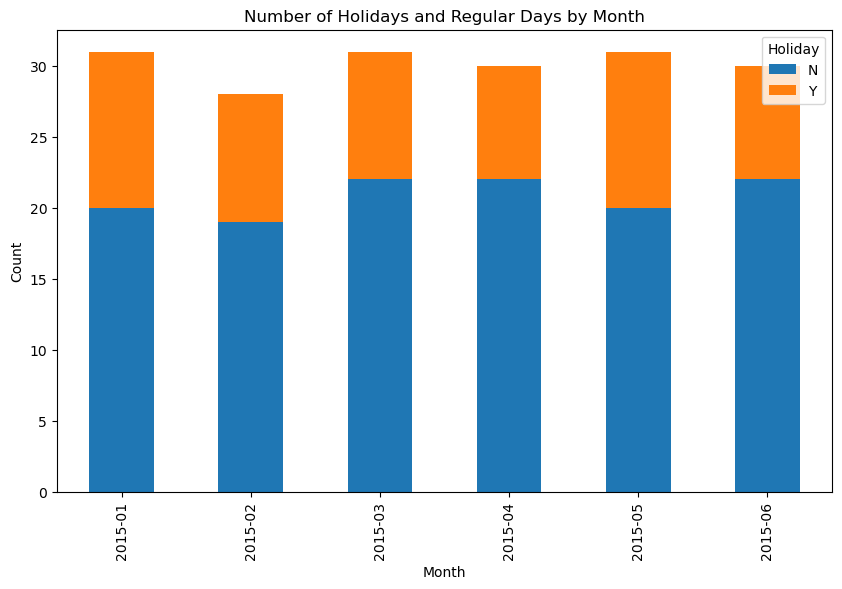

In [22]:
# Extract the month from 'pickup_dt'
counter['Month'] = counter['pickup_dt'].dt.strftime('%Y-%m')

# Group the data by month and count the number of holidays and regular days
monthly_counts = counter.groupby(['Month', 'Holiday']).size().unstack(fill_value=0)

# Reset the index to ensure 'Month' is a column and not the index
monthly_counts = monthly_counts.reset_index()

# Plot the data
monthly_counts.plot(x='Month', kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Holidays and Regular Days by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Holiday', loc='upper right')

# Show the plot
plt.show()



In [23]:

# Rename columns for clarity
monthly_counts.rename(columns={'N': 'Regular', 'Y': 'Holiday'}, inplace=True)
monthly_counts


Holiday,Month,Regular,Holiday
0,2015-01,20,11
1,2015-02,19,9
2,2015-03,22,9
3,2015-04,22,8
4,2015-05,20,11
5,2015-06,22,8


In [24]:
borough_pickup_counts = uber_weather_df.groupby('borough')['pickups'].sum().reset_index()
borough_pickup_counts


,borough,pickups
0,Bronx,220080.0
1,Brooklyn,2321552.0
2,EWR,105.0
3,Manhattan,10369142.0
4,Queens,1343771.0
5,Staten Island,6957.0


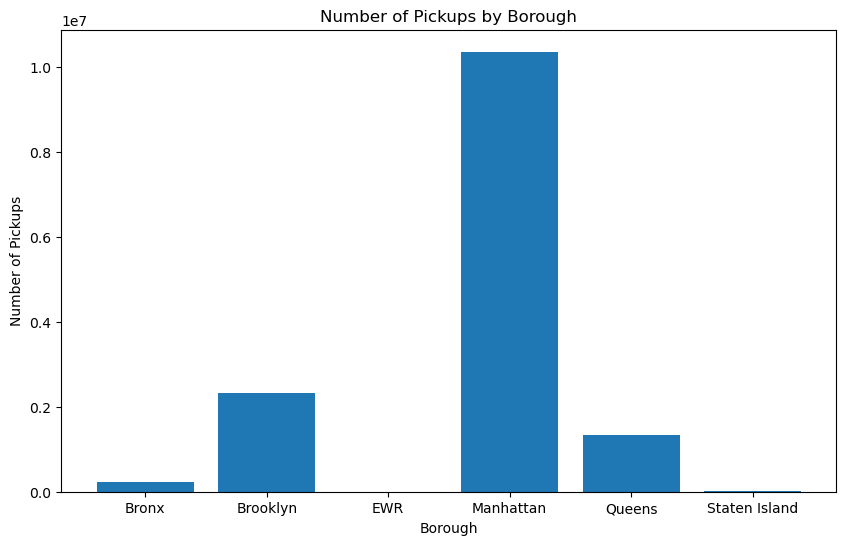

In [25]:
# Create a bar plot to visualize the number of pickups by each borough
plt.figure(figsize=(10, 6))
plt.bar(borough_pickup_counts['borough'], borough_pickup_counts['pickups'])
plt.title('Number of Pickups by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Pickups')

# Show the plot
plt.show()

In [26]:
# Group the data by 'borough' and 'Holiday' and calculate the sum of 'pickups' for each group
pickup_counts_by_borough_and_holiday = uber_weather_df.groupby(['borough', 'Holiday'])['pickups'].sum().reset_index()
pickup_counts_by_borough_and_holiday

,borough,Holiday,pickups
0,Bronx,N,143506.0
1,Bronx,Y,76574.0
2,Brooklyn,N,1419505.0
3,Brooklyn,Y,902047.0
4,EWR,N,84.0
5,EWR,Y,21.0
6,Manhattan,N,7361703.0
7,Manhattan,Y,3007439.0
8,Queens,N,919930.0
9,Queens,Y,423841.0


In [27]:
# Calculate the total pickups for each borough
total_pickups_by_borough = uber_weather_df.groupby('borough')['pickups'].sum().reset_index()
total_pickups_by_borough

,borough,pickups
0,Bronx,220080.0
1,Brooklyn,2321552.0
2,EWR,105.0
3,Manhattan,10369142.0
4,Queens,1343771.0
5,Staten Island,6957.0


In [28]:
#pickup_counts_by_borough_and_holiday = pickup_counts_by_borough_and_holiday.drop('pickups_total', axis=1)
#pickup_counts_by_borough_and_holiday = pickup_counts_by_borough_and_holiday.drop('Proportion', axis=1)

# Calculate the proportion of pickups for each borough by holiday status
pickup_counts_by_borough_and_holiday = pd.merge(
    pickup_counts_by_borough_and_holiday,
    total_pickups_by_borough,
    on='borough',
    suffixes=('', '_total')
)
#pickup_counts_by_borough_and_holiday
pickup_counts_by_borough_and_holiday['Percentage'] = (
    pickup_counts_by_borough_and_holiday['pickups'] / pickup_counts_by_borough_and_holiday['pickups_total']*100
   )

pickup_counts_by_borough_and_holiday


,borough,Holiday,pickups,pickups_total,Percentage
0,Bronx,N,143506.0,220080.0,65.206289
1,Bronx,Y,76574.0,220080.0,34.793711
2,Brooklyn,N,1419505.0,2321552.0,61.144657
3,Brooklyn,Y,902047.0,2321552.0,38.855343
4,EWR,N,84.0,105.0,80.000000
5,EWR,Y,21.0,105.0,20.000000
6,Manhattan,N,7361703.0,10369142.0,70.996260
7,Manhattan,Y,3007439.0,10369142.0,29.003740
8,Queens,N,919930.0,1343771.0,68.458837
9,Queens,Y,423841.0,1343771.0,31.541163


In [29]:
# Create an index based on unique 'borough' values
boroughs = pickup_counts_by_borough_and_holiday['borough'].unique()
index = range(len(boroughs))
index

range(0, 6)

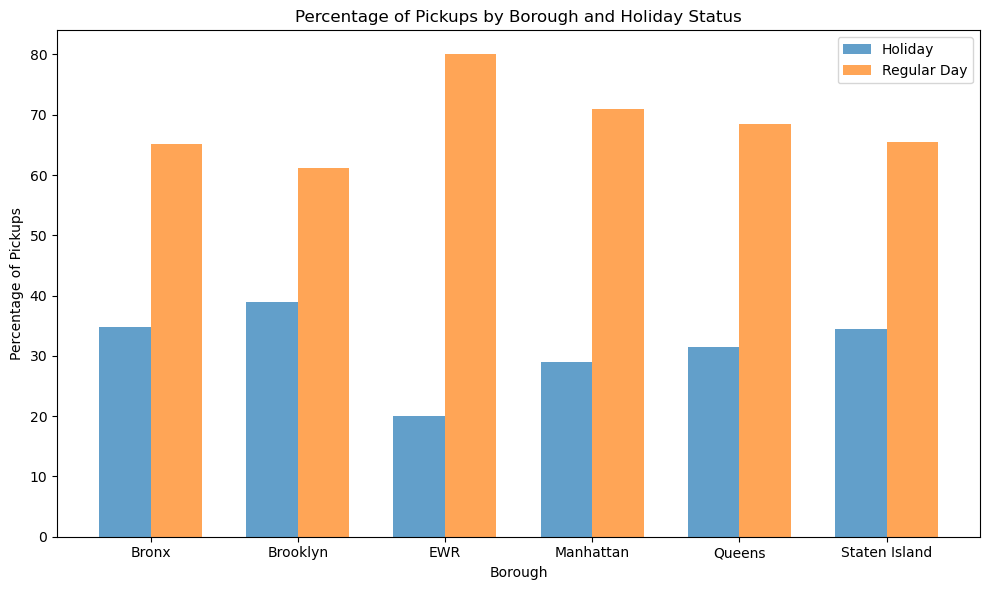

In [30]:
# Create a grouped bar plot to visualize the number of pickups in each borough by holiday status
plt.figure(figsize=(10, 6))
bar_width = 0.35
# Filter the data for 'Y' and 'N' holiday status
holiday_data = pickup_counts_by_borough_and_holiday[pickup_counts_by_borough_and_holiday['Holiday'] == 'Y']['Percentage']
regular_data = pickup_counts_by_borough_and_holiday[pickup_counts_by_borough_and_holiday['Holiday'] == 'N']['Percentage']
# Plot the data
bar1 = plt.bar(index, holiday_data, bar_width, label='Holiday', alpha=0.7)
bar2 = plt.bar([i + bar_width for i in index], regular_data, bar_width, label='Regular Day', alpha=0.7)

plt.xlabel('Borough')
plt.ylabel('Percentage of Pickups')
plt.title('Percentage of Pickups by Borough and Holiday Status')
plt.xticks([i + bar_width / 2 for i in index], boroughs)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

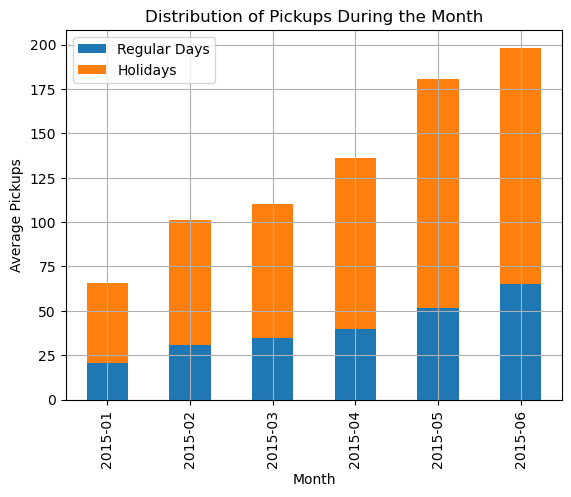

In [38]:

counter = counter.drop('is_holiday', axis=1)

# Create a new column 'is_holiday' based on the 'Holiday' column
counter['is_holiday'] = counter['Holiday'].apply(lambda x: 1 if x == 'Y' else 0)
counter
# Group the data by month and holiday status and calculate the average pickups
monthly_pickups = counter.groupby(['Month', 'is_holiday'])['pickups'].mean().unstack()

# Plot the distribution of pickups during the month for regular days and holidays
plt.figure(figsize=(12, 6))
monthly_pickups.plot(kind='bar', stacked=True)
plt.title('Distribution of Pickups During the Month')
plt.xlabel('Month')
plt.ylabel('Average Pickups')
plt.legend(['Regular Days', 'Holidays'])
plt.grid(True)
plt.show()








In [41]:
# Group the data by month and holiday status and count the pickups
monthly_pickup_counts = counter.groupby(['Month', 'is_holiday'])['pickups'].count().unstack()
monthly_pickup_counts
# Display the counts of pickups during each month on regular days and holidays
#print(monthly_pickup_counts)

is_holiday,0,1
Month,,
2015-01,20,11
2015-02,19,9
2015-03,22,9
2015-04,22,8
2015-05,20,11
2015-06,22,8
